<a href="https://colab.research.google.com/github/wndnjs2037/2021W_Python-/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC(%EB%82%98)_20220223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [1]:
# 결정트리학습법을 이용하여 모델을 만든다
# input -> 모델 -> output

# pandas로 데이터를 가져와서 그 데이터로 결정 트리 학습을 시켜서 모델을 만든다.

# 인공지능, 머신러닝, 딥러닝
# 인공지능 : 인간의 지능을 갖고있는 컴퓨터 시스템
# 머신러닝 : 인공지능을 만드는 방법 중 하나
# 대량의 자료들에서 핵심적인 내용을 추려내는 머신러닝의 일종
# 인공지능 > 머신러닝 > 딥러닝

# 대량의 자료들 -> 판다스로 불러와서 전처리
#  위의 자료 + 결정트리 학습법 -> 모델 만들기!
# 모델이 딥러닝 결과물 그 자체다

In [2]:
# sklearn
# 파이썬에서 머신러닝 분석을 할 때 유용하게 사용할 수 있는 라이브러리
# 오픈소스임
# 머신러닝 알고리즘이 구현되어 있다 ( 그 중 하나가 결정 트리 학습법 )
# 샘플 데이터셋이 포함되어있다.
# 초심자가 머신러닝 배울때 시작하기 적합한 라이부러리임

In [3]:
# 결정 트리 학습법 (decision tree learning)
# 관측값과 목표값을 연결시켜주는 예측 모델이다
# 특정 기준(질문)에 따라 데이터를 구분하는 모델이다.
# 한번의 분기 때 마다 변수 영역을 두개로 구분한다.
# 결정 트리에서 질문이나 정답을 담은 네모 상자를 노드라고 한다.

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

In [6]:
iris.keys() #어떤 키가 사용되었는지 확인 가능 - 아이리스는 dict 딕셔너리임

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
iris.feature_names #iris의 feature_names 데이터를 가져옴

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target_names #아이리스 꽃의 종류 3가지 확인 가능

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
print(iris.DESCR) #아이리스 데이터의 요약된 정보 확인

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
import seaborn as sns # 데이터를 시각화하기 위해 라이브러리 임포트

In [13]:
iris_pd = sns.load_dataset('iris') #로드데이터셋을 이용해 아이리스를 가져옴
iris_pd.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
iris_pd.shape # 행과  컬럼 개수 확인

(150, 5)

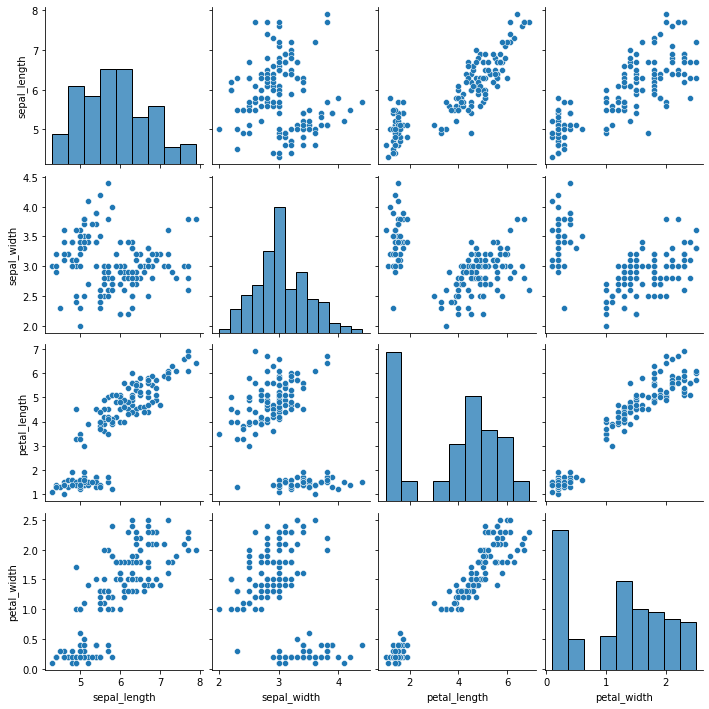

In [15]:
# pairplot 그리기
sns.pairplot(iris_pd) # 4개의 수치데이터로 표를 만들어줌 -> 종 정보는 빠져있음

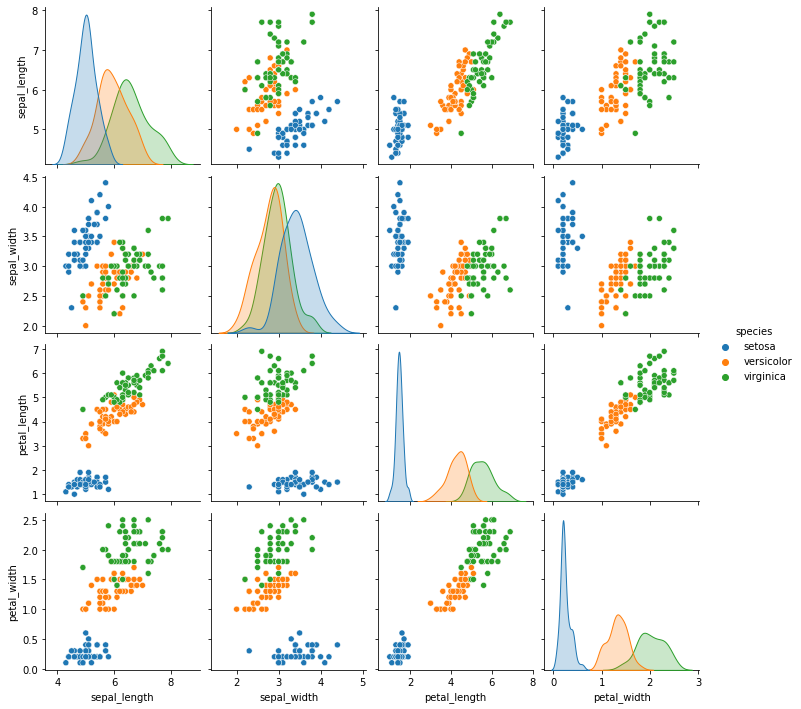

In [16]:
# 목표 : 아이리스를 채취했을떄 아이리스의 종류 중 어떤거인지 판별해주는 모델 만들기
# input : 우리가 관측한 꽃의 정보
# output : 해당 꽃이 무슨 꽃인지
sns.pairplot(iris_pd, hue='species')  # 종도 같이 확인하기 위해 인자를 추가해준다. 색깔별로 하나의 종임
# 종을 나누기 위해서는 총 세개의 값이 극명하게 다른 데이터를 사용해야함~~ 그래야 찍어봤을때 무슨 종인지 알기 쉽당

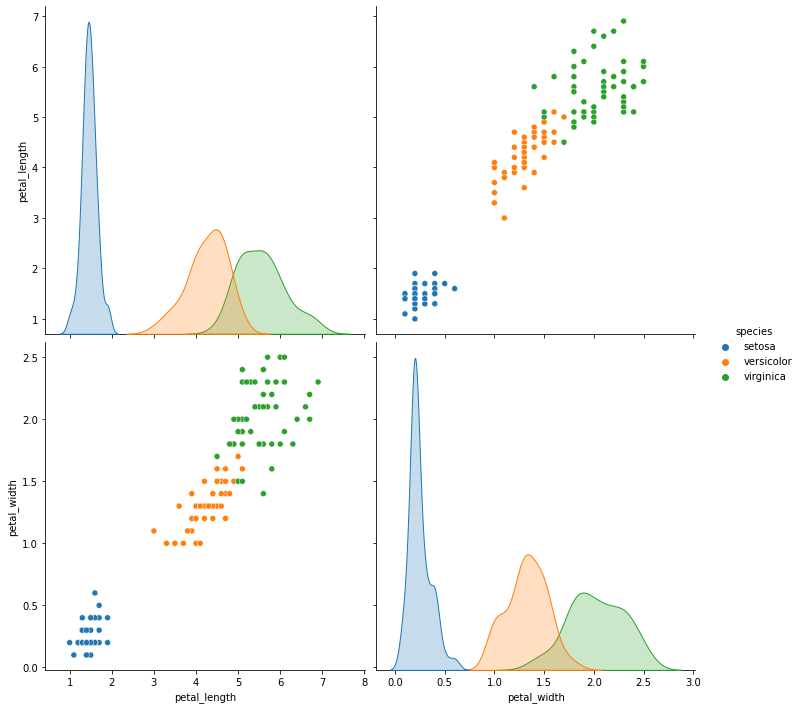

In [18]:
# petal_length, petal_width 두개의 값을 이용하면 종을 구분할 수 있당

sns.pairplot(iris_pd, height=5, vars=['petal_length', 'petal_width'], hue='species') #두개의 값으로 그래프 생성

In [24]:
# 결정나무 알고리즘을 사용하기 위해 DEcisionTreeClassifier 모듈 불러오기
from sklearn.tree import DecisionTreeClassifier

# 자동으로 데이터셋을 분리해주는 함수
from sklearn.model_selection import train_test_split

X = iris.data[:, 2:] 
y = iris.target # 쓰기로 한 4개의 값

# random_state : 난수 seed, 내부 알고리즘에서 랜덤 스테이트를 사용해서 data를 선택할때 이용한다. (랜덤하게 데이터를 선택해서 사용함)
# test_size : 데이터를 사용할 때, 얼만큼의 데이터를 사용할지 비율을 정하는 용도.
# max_depth : depth에 따라서 단계가 나뉘어서 정확도 증가하는듯
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [25]:
# 트리 학습 시키기

iris_tree = DecisionTreeClassifier(max_depth=3)
iris_tree.fit(X_train, y_train) #실제 아이리스 트리를 train(트레이닝)을 통해 학습시킨다 (결정트리 이용)

DecisionTreeClassifier(max_depth=3)

[Text(0.375, 0.875, 'sepal width (cm) <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]\nclass = virginica'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'sepal length (cm) <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]\nclass = virginica'),
 Text(0.25, 0.375, 'sepal width (cm) <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.75, 0.375, 'sepal length (cm) <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = virginica')]

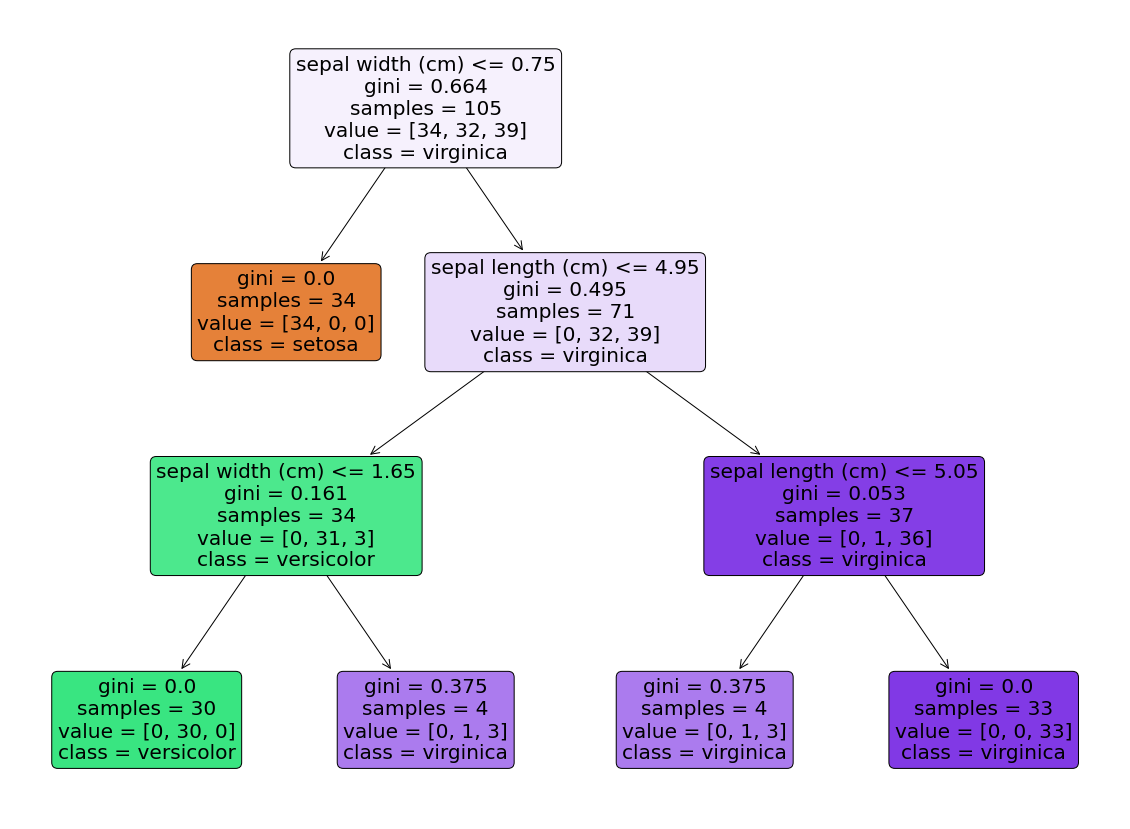

In [28]:
# 트리 그리기
import matplotlib.pyplot as plt
from sklearn import tree # 시각화를 위한 라이브러리 임포트

plt.figure(figsize=(20,15))
tree.plot_tree(iris_tree, class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True, rounded=True) #모델이 어떻게 생겼는지 볼 수 있음
# 화이트박스~!~!~!
# 결정나무 알고리즘!!

In [31]:
# 만든 모델 사용하기
# 관측된 값을 모델에 넣어서 결과를 얻는다. ( 관측 -> 모델 -> 결과)
# length :5, width :1.5cm 인 아이리스를 발견항 경우,

iris_tree.predict_proba([[5, 1.5]]) # 관측한 꽃에 대한 값이 나오는데, 각 종에 해당될 수 있는 확률이 값으로 나온다.

array([[0.  , 0.25, 0.75]])

In [33]:
iris.target_names # 종류의 데이터 알 수 있음 (순서)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
iris.target_names[iris_tree.predict([[5,1.5]])]  #타겟 네임즈를 사용해서 어떤 종인지 바로 나오게 할 수 있다.

array(['virginica'], dtype='<U10')

데이터 사이언티스트(데이터 소유, 데이터 전처리) <-> AI 엔지니어 (모델 생성)
데이터 사이언티스트는 모델을 사용하고 싶음
모델을 어떻게 사용하는지 몰라서 쉽게 사용하고 싶음~!~! -> 이대로 따라하면 됨
만들어놓은 모델에 대한 사용법이 잘 만들어져 있으면 다루기 쉽다.